<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


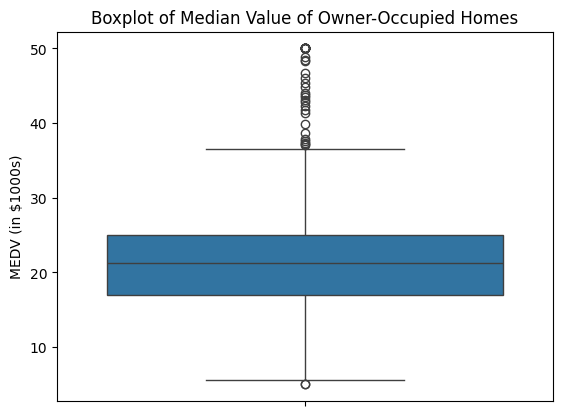

In [11]:
ax=sns.boxplot(y="MEDV", data=boston_df)
pyplot.title("Boxplot of Median Value of Owner-Occupied Homes")
pyplot.ylabel("MEDV (in $1000s)")
pyplot.show()
#Explanation: This boxplot shows the distribution of the median value of owner-occupied homes (MEDV).
#It helps identify the spread, central tendency, and any potential outliers in the dataset. 
#The box represents the interquartile range (IQR), while the line inside the box indicates the median value. 
#Whiskers extend to show the rest of the distribution, and individual points outside represent outliers.

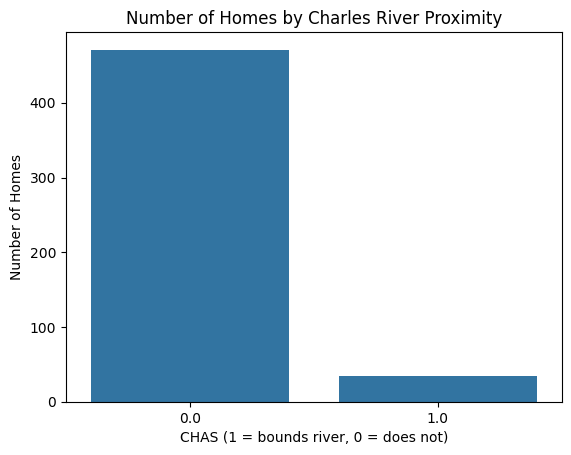

In [8]:
chas_counts = boston_df['CHAS'].value_counts().sort_index()
sns.barplot(x=chas_counts.index, y=chas_counts.values)
pyplot.title("Number of Homes by Charles River Proximity")
pyplot.xlabel("CHAS (1 = bounds river, 0 = does not)")
pyplot.ylabel("Number of Homes")
pyplot.show()
# explanation: This barplot displays the number of homes that are bounded by the Charles River (CHAS = 1) and those that are not (CHAS = 0). 
# It provides insight into the distribution of the CHAS variable and shows how common it is for homes in the dataset to be near the river.

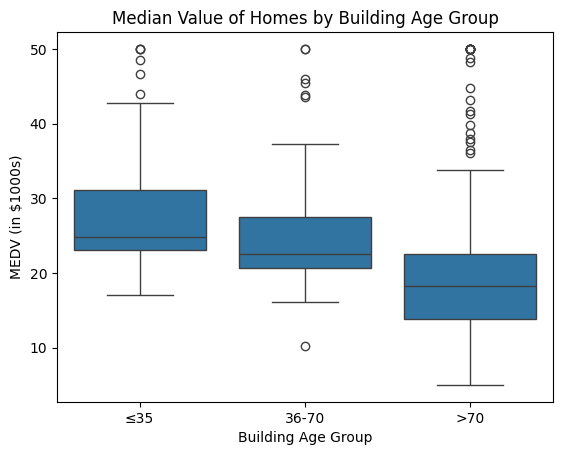

In [10]:
def age_group(age):
    if age <= 35:
        return '≤35'
    elif age <= 70:
        return '36-70'
    else:
        return '>70'

boston_df['AGE_GROUP'] = boston_df['AGE'].apply(age_group)
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, order=['≤35', '36-70', '>70'])
pyplot.title("Median Value of Homes by Building Age Group")
pyplot.xlabel("Building Age Group")
pyplot.ylabel("MEDV (in $1000s)")
pyplot.show()
# explanation: This boxplot shows the distribution of MEDV across different age groups of buildings: ≤35 years, 36–70 years, and >70 years. 
# It allows us to assess whether building age is associated with changes in home value. 
# By categorizing AGE, we can more easily compare median values and variability within each group.

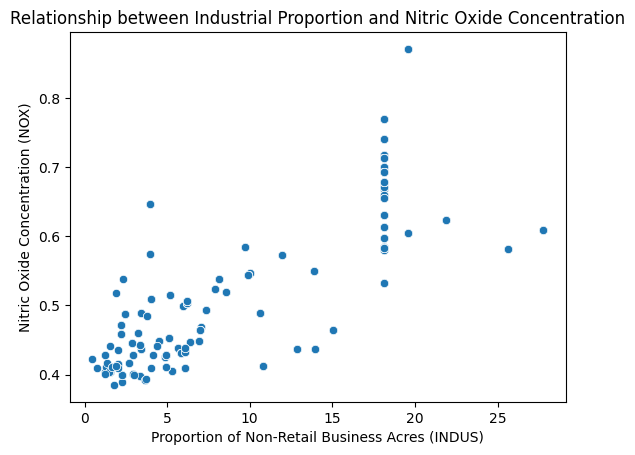

In [13]:
sns.scatterplot(x="INDUS",y="NOX",data=boston_df)
pyplot.title("Relationship between Industrial Proportion and Nitric Oxide Concentration")
pyplot.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
pyplot.ylabel("Nitric Oxide Concentration (NOX)")
pyplot.show()
# explanation: This scatter plot explores the relationship between the proportion of non-retail business acres per town (INDUS) and nitric oxide 
# concentration (NOX). A visible trend or pattern (e.g., upward sloping) may suggest correlation. 
# The plot helps determine whether towns with more industrial areas also experience higher NOX levels.



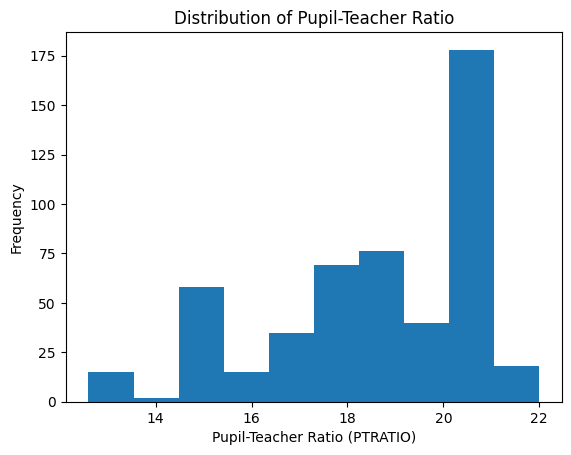

In [14]:
pyplot.hist(boston_df["PTRATIO"])
pyplot.title("Distribution of Pupil-Teacher Ratio")
pyplot.xlabel("Pupil-Teacher Ratio (PTRATIO)")
pyplot.ylabel("Frequency")
pyplot.show()
# Explanation:
# This histogram shows the distribution of the pupil-to-teacher ratio across towns. 
# It reveals how this ratio varies and whether certain values are more common. 
# The shape of the histogram helps identify skewness, modality, and spread in the educational environment across the dataset.

In [15]:
from scipy.stats import ttest_ind
# Split MEDV by CHAS groups
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Independent samples t-test
t_stat, p_val = ttest_ind(medv_chas_0, medv_chas_1, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")
#null hypothesis: there is no significant difference in median value of houses bounded by the Charles river.
#alternative hypothesis: there is significant difference in median value of houses bounded by the Charles river.
#conclusion: we have to reject the null hypothesis and conclude there is significant difference in median value of houses bounded by the Charles river(p-value=0.0036).

T-statistic: -3.1133, p-value: 0.0036


In [16]:
from scipy.stats import f_oneway

# Categorize AGE into 3 groups
boston_df['AGE_GROUP'] = boston_df['AGE'].apply(age_group)  # reuse from earlier

# Perform one-way ANOVA
group1 = boston_df[boston_df['AGE_GROUP'] == '≤35']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == '36-70']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '>70']['MEDV']

f_stat, p_val = f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")
# null hypothesis: there is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
# alternative hypothesis: there is difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)
# conclusion: we have to reject the null hypothesis and conclude there is difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)(p-value<0.05)

F-statistic: 36.4076, p-value: 0.0000


In [17]:
from scipy.stats import pearsonr

r_val, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson r: {r_val:.4f}, p-value: {p_val:.4f}")
# null hypothesis: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
# alternative hypothesis: there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
# conclusion: we have to reject the null hypothesis and conclude there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Pearson r: 0.7637, p-value: 0.0000


In [18]:
import statsmodels.api as sm

X = boston_df[['DIS']]
X = sm.add_constant(X)  # add intercept
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
print(model.summary())
# null hypothesis: there is no significant difference for an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
# alternative hypothesis: there is significant difference for an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
# explanation: coefficient is 1.09, meaning that for each additional unit of weighted distance from employment centers, the median home value increases by about $1,091

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 05 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        13:41:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0